# **Indonesian Sentence Boundary Disambiguation Using Part-of-Speech Tagging**

# **Problem Brief**

Input  : Ini adalah kalimat pertama Kalau yang ini adalah kalimat kedua

Output : 
*   Ini adalah kalimat pertama
*   Kalau yang ini adalah kalimat kedua

Tujuan : Mengembalikan kalimat kalimat yang ada dalam sebuah paragraf / kalimat yang terdiri dari 2 atau lebih kalimat

# **Dataset Acquisition**


In [ ]:
dsets = [] # List untuk menampung semua kalimat dipisahkan dengan \n
dset = [] # List untuk menampung kalimat yang berisi token/kata dari kalimat

rawdataset_file = ['/content/drive/MyDrive/Tugas Akhir/Coding/Corpus/Raw Corpus (Kurniawan dan Aji, 2019)/dev.0',
                   '/content/drive/MyDrive/Tugas Akhir/Coding/Corpus/Raw Corpus (Kurniawan dan Aji, 2019)/test.0',
                   '/content/drive/MyDrive/Tugas Akhir/Coding/Corpus/Raw Corpus (Kurniawan dan Aji, 2019)/train.0']

# Menggabungkan kalimat yang ada dalam beberapa file menjadi 1 file
for path in rawdataset_file:
  for i in range(5):
      raw = open(path+str(i+1)+'.tsv').readlines()
      raw = [i.strip().split('\t') for i in raw]
      for j,row in enumerate(raw):
          # Jika j = genap maka kalimat di append tanpa tanda baca
          if j%2 == 0:
              if len(row) == 2:
                  if row[0] not in ['.',',','!','?','"',"'"]:
                      dset.append(row[0])
              else:
                  if dsets == []:
                      if dset != []:
                          dsets.append(dset)
                          dset = []
                  else:
                      for d in dsets:
                          if dset != d:
                              if dset != []:
                                  dsets.append(dset)
                                  dset = []
          # Jika j = ganjil maka kalimat akan di append dengan tanda baca
          else:
              if len(row) == 2:
                  dset.append(row[0])
              else:
                  if dsets == []:
                      if dset != []:
                          dsets.append(dset)
                          dset = []
                  else:
                      for d in dsets:
                          if dset != d:
                              if dset != []:
                                  dsets.append(dset)
                                  dset = []
      print('Get Corpus ' + str(path+str(i+1)+'.tsv') + ' Finished!')

Get Corpus /content/drive/MyDrive/Tugas Akhir/Coding/Corpus/Raw Corpus (Kurniawan dan Aji, 2019)/dev.01.tsv Finished!
Get Corpus /content/drive/MyDrive/Tugas Akhir/Coding/Corpus/Raw Corpus (Kurniawan dan Aji, 2019)/dev.02.tsv Finished!
Get Corpus /content/drive/MyDrive/Tugas Akhir/Coding/Corpus/Raw Corpus (Kurniawan dan Aji, 2019)/dev.03.tsv Finished!
Get Corpus /content/drive/MyDrive/Tugas Akhir/Coding/Corpus/Raw Corpus (Kurniawan dan Aji, 2019)/dev.04.tsv Finished!
Get Corpus /content/drive/MyDrive/Tugas Akhir/Coding/Corpus/Raw Corpus (Kurniawan dan Aji, 2019)/dev.05.tsv Finished!
Get Corpus /content/drive/MyDrive/Tugas Akhir/Coding/Corpus/Raw Corpus (Kurniawan dan Aji, 2019)/test.01.tsv Finished!
Get Corpus /content/drive/MyDrive/Tugas Akhir/Coding/Corpus/Raw Corpus (Kurniawan dan Aji, 2019)/test.02.tsv Finished!
Get Corpus /content/drive/MyDrive/Tugas Akhir/Coding/Corpus/Raw Corpus (Kurniawan dan Aji, 2019)/test.03.tsv Finished!
Get Corpus /content/drive/MyDrive/Tugas Akhir/Coding/

In [ ]:
for dset in dsets[:3]:
  print(dset)

['Ini', 'adalah', 'masa', 'dalam', 'kehidupan', 'saat', 'masalah', 'kesehatan', 'mulai', 'merembes', 'ke', 'dalam', 'hidup', 'kita', 'dan', 'pada', 'masa lalu', ',', 'para', 'dokter', 'memberi', 'saran', 'kata', 'Balzer', ',', 'Wakil', 'Presiden', 'NPD', '.']
['Ia', 'diduga', 'akan', 'menjual', 'buaya-buaya', 'itu', 'ke', 'kebun binatang', 'lokal', 'di', 'Gaza']
['Ini', 'kan', 'kombinasi', ',', 'kata', '-nya']


In [ ]:
# Labelling
dsets01 = []
dsets02 = []
dsetsFinal = []

for dset in dsets:
    dsets01.append(' '.join(dset))

for dset in dsets01:
    dsets02.append(dset.split(' '))

for dset in dsets02:
    corp = []
    for i,word in enumerate(dset):
        if i == 0:
            corp.append(word+'\t'+'1')
        else:
            corp.append(word+'\t'+'0')
    dsetsFinal.append(corp)

In [ ]:
for dset in dsetsFinal[:3]:
  print(dset)

['Ini\t1', 'adalah\t0', 'masa\t0', 'dalam\t0', 'kehidupan\t0', 'saat\t0', 'masalah\t0', 'kesehatan\t0', 'mulai\t0', 'merembes\t0', 'ke\t0', 'dalam\t0', 'hidup\t0', 'kita\t0', 'dan\t0', 'pada\t0', 'masa\t0', 'lalu\t0', ',\t0', 'para\t0', 'dokter\t0', 'memberi\t0', 'saran\t0', 'kata\t0', 'Balzer\t0', ',\t0', 'Wakil\t0', 'Presiden\t0', 'NPD\t0', '.\t0']
['Ia\t1', 'diduga\t0', 'akan\t0', 'menjual\t0', 'buaya-buaya\t0', 'itu\t0', 'ke\t0', 'kebun\t0', 'binatang\t0', 'lokal\t0', 'di\t0', 'Gaza\t0']
['Ini\t1', 'kan\t0', 'kombinasi\t0', ',\t0', 'kata\t0', '-nya\t0']


In [ ]:
with open('/content/drive/MyDrive/Tugas Akhir/Coding/Corpus/dsetCorpus.txt', 'w') as f:
    for sentence in dsetsFinal:
        for word in sentence:
            f.write('%s\n' % word)
        f.write('\n')

# **Import Library**
*   **DictVectorizer** : Vektorisasi fitur kata
*   **train_test_split** : split dataset menjadi data latih dan data uji (stratify)
*   **cross_val_score** : Tes stabilitas model dengan menggunakan cross validation (stratified)
*   **classification_report** : melihat performa model berdasarkan akurasi, recall, precision, f1-score
*   **confusion_matric** : melihat persebaran prediksi model terhadap data
*   **accuracy_score** : melihat akurasi dari model


In [ ]:
# Processing
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Algorithms
from sklearn.svm import LinearSVC

# Save Model 
import pickle

# **Built-In Function**
*   **load_dataset** : memuat dataset
*   **join_some_sentence** : menggabungkan beberapa kalimat menjadi satu kalimat panjang
*   **get_feature** : membuat fitur dari setiap kata pada yang ada pada kalimat
*   **get_report** : menampilkan classification report, confussion matrix dan accuracy score
*   **sent_segment_svc** : memecah kalimat
*   **print_sentences** : menampilkan hasil dari pemecahan kalimat


In [ ]:
def load_dset(dset_name):
  dset = open('/content/drive/MyDrive/Tugas Akhir/Coding/Corpus/'+dset_name,'r')
  return dset

def join_some_sentence(dset, num_of_sentence):
# Dataset Model 2.1 --> 3 / 5 kalimat
  sentences = []
  sentence = []
  counter = 0
  for word in dset:
    word_tag = word.replace('\n','').split('\t')
    if len(sentences)%2==0:
      if counter < num_of_sentence:
        if len(word) > 1 :
          sentence.append((word_tag[0],word_tag[1]))
        else:
          counter += 1
      else:
        sentences.append(sentence)
        sentence = []
        counter = 0
        if len(word) > 1 :
          sentence.append((word_tag[0].lower(),word_tag[1]))
        else:
          counter += 1
    else:
      if counter < num_of_sentence:
        if len(word) > 1 :
          sentence.append((word_tag[0].lower(),word_tag[1]))
        else:
          counter += 1
      else:
        sentences.append(sentence)
        sentence = []
        counter = 0
        if len(word) > 1 :
          sentence.append((word_tag[0],word_tag[1]))
        else:
          counter += 1
  return sentences

def get_feature(token, tag,token_index, sent):
  token_feature = {
      'bias'                  : 1.0,

      'init.token.digit'       : token.isdigit(),
      'init.token.capsInside'  : token[1:].lower() != token[1:],

      'init.token[3:]'         : '' if len(token) < 3  else token[:3],
      'init.token[2:]'         : '' if len(token) < 2  else token[:2],
      'init.token[-3:]'        : '' if len(token) < 3  else token[-3:],
      'init.token[-2:]'        : '' if len(token) < 2  else token[-2:],
      
      'init.token.lower'       : token.lower(),
      'init.token.title'       : token.istitle(),
      'init.token.upper'       : token.isupper(),
      
      'prev.token.lower'       : '' if token_index == 0     else sent[token_index - 1][0].lower(),
      'prev.token.title'       : '' if token_index == 0     else sent[token_index - 1][0].istitle(),
      'prev.token.upper'       : '' if token_index == 0     else sent[token_index - 1][0].isupper(),
      
      'next.token.lower'       : '' if token_index == len(sent) - 1     else sent[token_index + 1][0].lower(),
      'next.token.title'       : '' if token_index == len(sent) - 1     else sent[token_index + 1][0].istitle(),
      'next.token.upper'       : '' if token_index == len(sent) - 1     else sent[token_index + 1][0].isupper(),
    }
  return token_feature

def get_report(y, y_pred):
  print('classification report')
  print(classification_report(y, y_pred))
  print('\n')
  print('confusion matrix')
  print(confusion_matrix(y, y_pred))
  print('\n')
  print('classification report')
  print(accuracy_score(y, y_pred))

def sent_segment_svc(artic):
  artic = re.findall(r"[\w']+|[.,!?;]", artic)
  null_tags = [(token, 'NULL') for token in artic]
  input = [get_feature(null_tags[i][0], null_tags[i][1],i, null_tags) for i in range(len(null_tags))]
  X_artic = vectorizer.transform(input)
  y_artic = svc_model.predict(X_artic)
  print_sentences(artic, y_artic)

def print_sentences(artic, y_artic):
  corpus = []
  corp = []
  for i,word in enumerate(list(zip(artic, y_artic))):
    if (word[1] == '1'):
      if corp != []:
        corpus.append(corp)
        corp = []
      corp.append(word[0])
    elif (i == (len(artic)-1)):
      if corp != []:
        corp.append(word[0])
        corpus.append(corp)
        corp = []
    else:
      corp.append(word[0])

  for sentence in corpus:
    sentence = ' '.join(sentence)
    print(sentence)

# **Feature Extraction Variable**
### - Bias
* bias


### - Kata Setelah
* next.token.title
* next.token.upper
* next.token.lower


### - Kata Sebelum
* prev.token.title
* prev.token.upper
* prev.token.lower


### - Kata Init
* init.token.lower
* init.token.title
* init.token.upper
* init.token.digit
* init.capInside
* init.token[-2:]
* init.token[-3:]
* init.token[2:]
* init.token[3:]

In [ ]:
s = [('Ini',1),('adalah',0),('percobaan',0),('pertama',0)]
get_feature(s[2][0], s[2][1], 2, s)

{'bias': 1.0,
 'init.token.capsInside': False,
 'init.token.digit': False,
 'init.token.lower': 'percobaan',
 'init.token.title': False,
 'init.token.upper': False,
 'init.token[-2:]': 'an',
 'init.token[-3:]': 'aan',
 'init.token[2:]': 'pe',
 'init.token[3:]': 'per',
 'next.token.lower': 'pertama',
 'next.token.title': False,
 'next.token.upper': False,
 'prev.token.lower': 'adalah',
 'prev.token.title': False,
 'prev.token.upper': False}

# **Model Development**

### Memuat Dataset
Memuat Dataset Dengan Menggunakan Fungsi load_dset

In [ ]:
# LOAD DATASET
dset = load_dset('dsetCorpus.txt')
dset = dset.readlines()

### Penyiapan Dataset / Preprocessing


*   Penggabungan Kalimat
Dilakukan penggabungan kalimat karena dataset mentah terdiri kalimat kalimat tunggal saja, pada hasil ini digunakan penggabungan sejumlah 5 kalimat menjadi 1 buah kalimat panjang

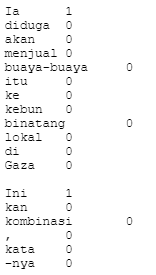

*   Vektorisasi Fitur -> Penyesuaian agar dapat diproses oleh algoritma SVM
*   Split Dataset -> Memisah menjadi dataset menjadi data latih dan data uji secara stratify



### Dataset Sebelum Penggabungan Kalimat

In [ ]:
ss = []
s = []
for word in dset:
  word = word.replace('\n','').split('\t')
  if len(word) == 2:
    if word[1] == '1':
      if s != []:
        ss.append(s)
        s = []
      s.append((word[0], word[1]))
    else:
      s.append((word[0], word[1]))

In [ ]:
print(ss[0])

[('Ini', '1'), ('adalah', '0'), ('masa', '0'), ('dalam', '0'), ('kehidupan', '0'), ('saat', '0'), ('masalah', '0'), ('kesehatan', '0'), ('mulai', '0'), ('merembes', '0'), ('ke', '0'), ('dalam', '0'), ('hidup', '0'), ('kita', '0'), ('dan', '0'), ('pada', '0'), ('masa', '0'), ('lalu', '0'), (',', '0'), ('para', '0'), ('dokter', '0'), ('memberi', '0'), ('saran', '0'), ('kata', '0'), ('Balzer', '0'), (',', '0'), ('Wakil', '0'), ('Presiden', '0'), ('NPD', '0'), ('.', '0')]


### Dataset Setelah Penggabungan Kalimat

In [ ]:
# join sentence
sentences = join_some_sentence(dset, 5)

In [ ]:
print(sentences[0])

[('Ini', '1'), ('adalah', '0'), ('masa', '0'), ('dalam', '0'), ('kehidupan', '0'), ('saat', '0'), ('masalah', '0'), ('kesehatan', '0'), ('mulai', '0'), ('merembes', '0'), ('ke', '0'), ('dalam', '0'), ('hidup', '0'), ('kita', '0'), ('dan', '0'), ('pada', '0'), ('masa', '0'), ('lalu', '0'), (',', '0'), ('para', '0'), ('dokter', '0'), ('memberi', '0'), ('saran', '0'), ('kata', '0'), ('Balzer', '0'), (',', '0'), ('Wakil', '0'), ('Presiden', '0'), ('NPD', '0'), ('.', '0'), ('Ia', '1'), ('diduga', '0'), ('akan', '0'), ('menjual', '0'), ('buaya-buaya', '0'), ('itu', '0'), ('ke', '0'), ('kebun', '0'), ('binatang', '0'), ('lokal', '0'), ('di', '0'), ('Gaza', '0'), ('Ini', '1'), ('kan', '0'), ('kombinasi', '0'), (',', '0'), ('kata', '0'), ('-nya', '0'), ('Jeritan', '1'), ('tanpa', '0'), ('suara', '0'), ('itu', '0'), ('terasa', '0'), ('menyayat', '0'), ('sanubari', '0'), ('membuat', '0'), ('kita', '0'), ('bergegas', '0'), ('ingin', '0'), ('mengulurkan', '0'), ('tangan', '0'), ('BRI', '1'), ('Unit

### Ekstraksi Fitur, Vektorisasi Fitur X, dan Split Dataset

In [ ]:
# extract feature
X = []
for sentence in sentences:
    for k in range(len(sentence)):
      X.append(get_feature(sentence[k][0], sentence[k][1], k, sentence))

y = []
for sentence in sentences:
    for k in range(len(sentence)):
        y.append(sentence[k][1])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0, 
                                                    test_size=0.33, 
                                                    stratify=y)

In [ ]:
vectorizer = DictVectorizer(sparse=False)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## **Fitur Sebelum Di Vektorisasi**

In [ ]:
pd.set_option("display.max_columns", 8)

In [ ]:
df = pd.DataFrame(X_train)
df['target'] = y_train

In [ ]:
df

,bias,init.token.digit,init.token.capsInside,init.token[3:],...,next.token.lower,next.token.title,next.token.upper,target
0,1.0,False,False,sec,...,year,False,False,0
1,1.0,False,False,mak,...,pertumbuhan,False,False,0
2,1.0,False,False,-ny,...,ke,False,False,0
3,1.0,False,False,pen,...,arthasentosa,False,False,0
4,1.0,False,False,sej,...,tanggal,False,False,0
...,...,...,...,...,...,...,...,...,...
8812,1.0,False,False,ter,...,stabil,False,False,0
8813,1.0,False,False,inf,...,",",False,False,0
8814,1.0,False,False,,...,,,,0
8815,1.0,False,False,yan,...,positif,False,False,0


## **Fitur Setelah Di Vektorisasi**

In [ ]:
vdf = pd.DataFrame(X_train_vec)
vdf['target'] = y_train

In [ ]:
vdf

,0,1,2,3,...,10913,10914,10915,target
0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0
3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
8812,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0
8813,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0
8814,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0
8815,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0


## **Persebaran Label**

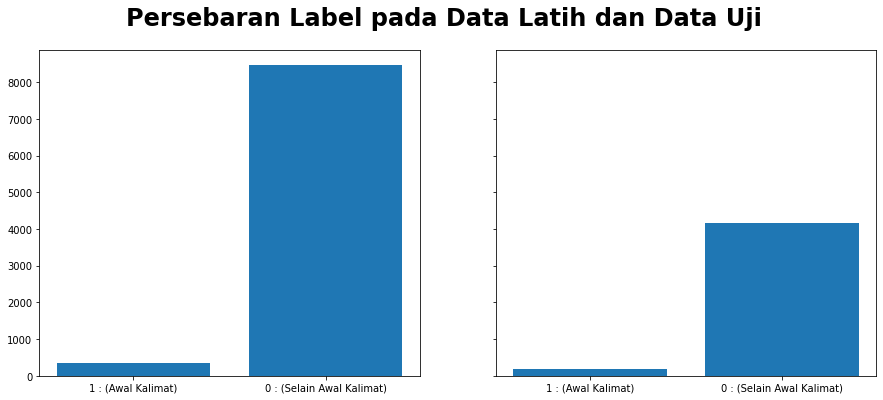

In [ ]:
# Jumlah Setiap Tag / Tanda Pada Setiap Jenis Data
trsatu = 0
trnol = 0
for i in y_train:
  if i == '1' :
    trsatu+=1
  else:
    trnol+=1

tssatu = 0
tsnol = 0
for i in y_test:
  if i == '1' :
    tssatu+=1
  else:
    tsnol+=1

trdata = {'1 : (Awal Kalimat)' : trsatu, '0 : (Selain Awal Kalimat)' : trnol}
trlabel = list(trdata.keys())
trvalues = list(trdata.values())

tsdata = {'1 : (Awal Kalimat)' : tssatu, '0 : (Selain Awal Kalimat)' : tsnol}
tslabel = list(tsdata.keys())
tsvalues = list(tsdata.values())

fig, ax = plt.subplots(1, 2,figsize=(15,6), sharey=True)

ax[0].bar(trlabel, trvalues)
ax[1].bar(tslabel, tsvalues)

plt.suptitle('Persebaran Label pada Data Latih dan Data Uji', fontsize=24, fontweight='bold')
plt.show()

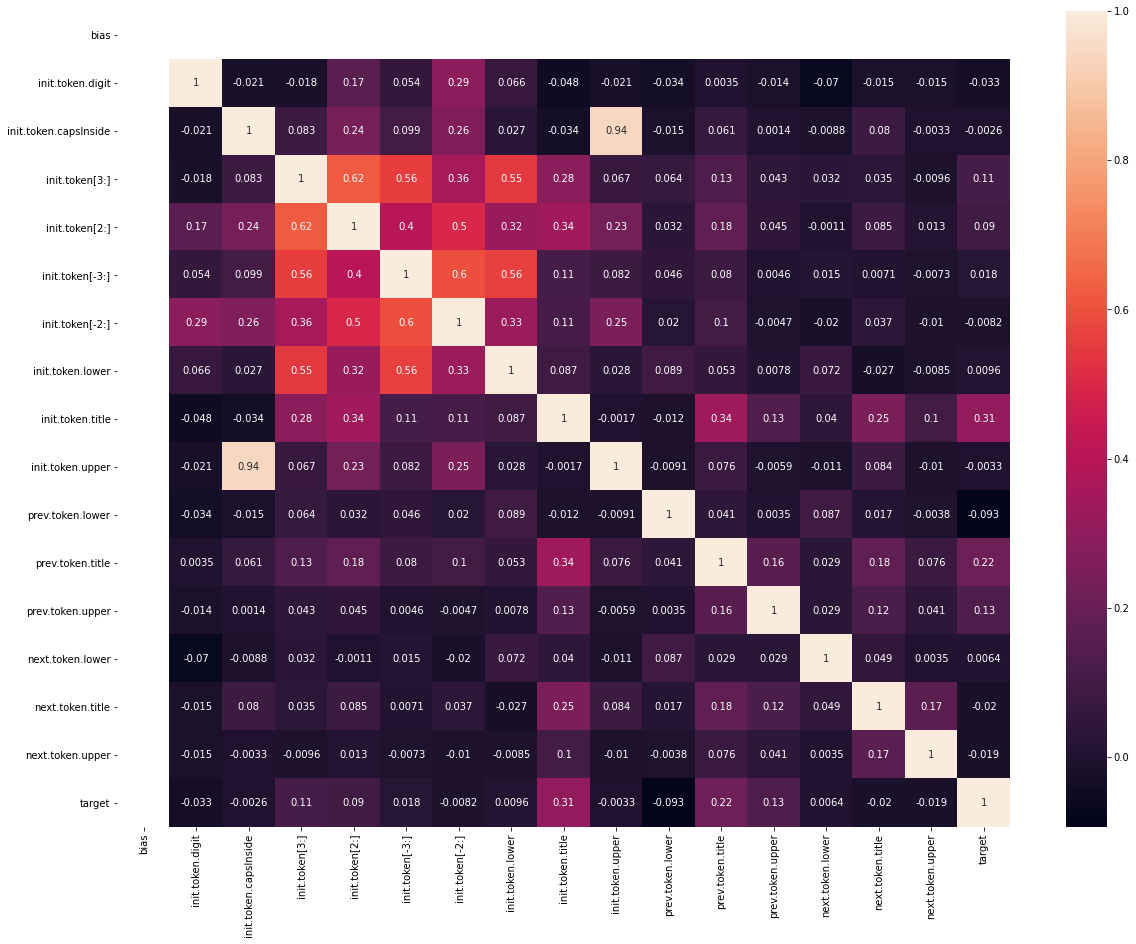

In [ ]:
import seaborn as sns
corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True)

## **Fitting Model dan Audit Performa Model**
Dilakukan Pengecekan Performa Model Berdasarkan 
*   Akurasi
*   Recall
*   Precision
*   F1-score


### Train Model

In [ ]:
# BUILD MODEL
svc_model = LinearSVC().fit(X_train_vec,y_train)
# svc_model = LinearSVC().fit(transformed_train[[0,1]],transformed_train["target"])

### Data Train Evaluation

In [ ]:
# cross validation
print('\033[94m'+'CROSS VALIDATION REPORT')
trscores = cross_val_score(svc_model, X_train_vec, y_train, cv=10)
for i,score in enumerate(trscores):
  print('Cross Val Fold-'+str(i+1)+' : '+str(score))

# train performance report
print('\033[92m'+'\nTRAIN PERFORMANCE REPORT')
y_train_pred = svc_model.predict(X_train_vec)
get_report(y_train, y_train_pred)

CROSS VALIDATION REPORT
Cross Val Fold-1 : 0.9841269841269841
Cross Val Fold-2 : 0.9841269841269841
Cross Val Fold-3 : 0.9852607709750567
Cross Val Fold-4 : 0.9863945578231292
Cross Val Fold-5 : 0.9795918367346939
Cross Val Fold-6 : 0.9841269841269841
Cross Val Fold-7 : 0.9863945578231292
Cross Val Fold-8 : 0.9829738933030647
Cross Val Fold-9 : 0.9863791146424518
Cross Val Fold-10 : 0.9829738933030647

TRAIN PERFORMANCE REPORT
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8465
           1       1.00      0.99      1.00       352

    accuracy                           1.00      8817
   macro avg       1.00      1.00      1.00      8817
weighted avg       1.00      1.00      1.00      8817



confusion matrix
[[8464    1]
 [   2  350]]


classification report
0.9996597482136781


### Data Test Evaluation

In [ ]:
# cross val on test
print('\033[94m'+'CROSS VALIDATION REPORT')
tsscores = cross_val_score(svc_model, X_test_vec, y_test, cv=10)
for i,score in enumerate(tsscores):
  print('Cross Val Fold-'+str(i+1)+' : '+str(score))

# test performance report
print('\033[92m'+'\nTEST PERFORMANCE REPORT')
y_test_pred = svc_model.predict(X_test_vec)
get_report(y_test, y_test_pred)

CROSS VALIDATION REPORT
Cross Val Fold-1 : 0.9770114942528736
Cross Val Fold-2 : 0.9816091954022989
Cross Val Fold-3 : 0.9724137931034482
Cross Val Fold-4 : 0.9907834101382489
Cross Val Fold-5 : 0.9907834101382489
Cross Val Fold-6 : 0.9838709677419355
Cross Val Fold-7 : 0.9838709677419355
Cross Val Fold-8 : 0.9861751152073732
Cross Val Fold-9 : 0.9838709677419355
Cross Val Fold-10 : 0.9769585253456221

TEST PERFORMANCE REPORT
classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4170
           1       0.90      0.70      0.79       173

    accuracy                           0.98      4343
   macro avg       0.94      0.85      0.89      4343
weighted avg       0.98      0.98      0.98      4343



confusion matrix
[[4156   14]
 [  52  121]]


classification report
0.9848031314759383


### Perbandingan 10-Fold CV pada data Train dan data Test

Text(0.5, 0.98, '10-Fold Cross Validation')

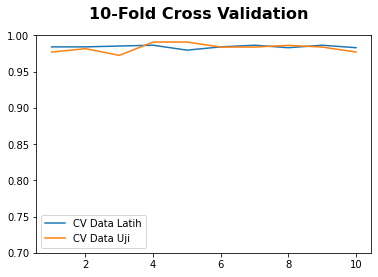

In [ ]:
trcv = {
    'fold' : [1,2,3,4,5,6,7,8,9,10],
    'score': trscores
}
tscv = {
    'fold' : [1,2,3,4,5,6,7,8,9,10],
    'score': tsscores
}

sns.lineplot(x=trcv['fold'], y=trcv['score'], label='CV Data Latih')
sns.lineplot(x=tscv['fold'], y=tscv['score'], label='CV Data Uji')
plt.ylim(0.7, 1.0)
plt.suptitle('10-Fold Cross Validation', fontsize=16, fontweight='bold')

### Perbandingan Accuracy, Precision, Recall, F1-score

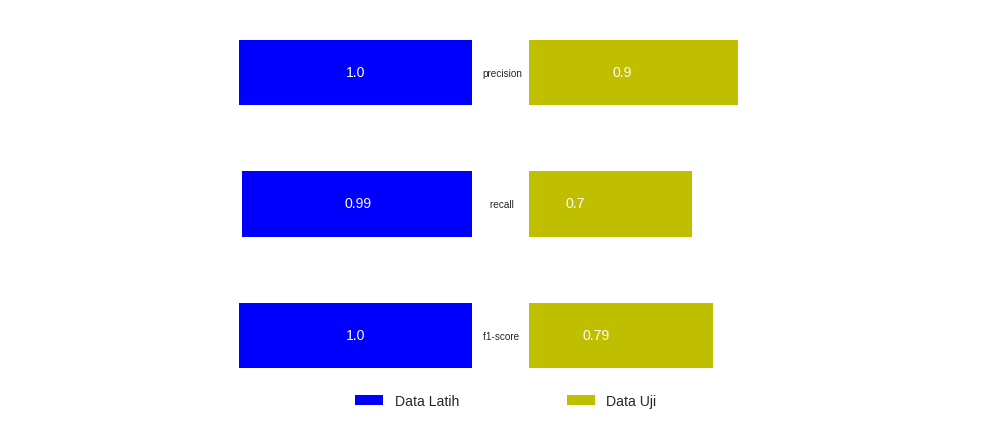

In [ ]:
plt.style.use('seaborn')
conf = {
    'Metrik' : ['f1-score ', 'recall   ', 'precision'],
    # 'Data Latih' : [-1.0, -1.0, -1.0],
    # 'Data Uji' : [0.99, 1, 0.99]

    # 1 'f1-score ', 'recall   ', 'precision'
    'Data Latih' : [-1.0, -0.99, -1.0],
    'Data Uji' : [0.79, 0.7, 0.9]
    
    # 'Metrik' : ['accuracy'],
    # 'Data Latih' : [-0.9996597482136781],
    # 'Data Uji' : [0.9848031314759383]
}
conf_df = pd.DataFrame(conf).set_index("Metrik")

fig, ax = plt.subplots(1,2, figsize=(14,6))
# plt.title('Evaluasi Model Identifikasi Label 0', x=0., y=1.1, fontsize=14, fontweight='bold', ha='center')

conf_df['Data Latih'].plot(kind='barh', ax=ax[0], color='b', xlim=[-2,0])
conf_df['Data Uji'].plot(kind='barh', ax=ax[1], color='y', xlim=[0,2])

ax[0].set_ylabel("") # menyembunyikan keterangan label sumbu y
ax[0].set_xticklabels([""]) #menyembunyikan keterangan skala sumbu x grafik kiri
ax[0].set_yticklabels([""]) #menyembunyikan keterangan skala sumbu y grafik kiri
ax[0].legend(["Data Latih"], fontsize=14, bbox_to_anchor=(0., 0., 1., .05))
ax[0].set_frame_on(False) # menyembunyikan frame grafik

ax[1].set_ylabel("") # menyembunyikan keterangan label sumbu y
ax[1].set_xticklabels([""]) #menyembunyikan keterangan sumbu x grafik kanan
ax[1].legend(["Data Uji"], fontsize=14, bbox_to_anchor=(0., 0., 0.3, .05))
ax[1].set_frame_on(False) # menyembunyikan frame grafik

# Menampilkan angka pada setiap bar
for i, m, w in zip(range(conf_df.shape[0]), list(conf_df['Data Latih']), list(conf_df['Data Uji'])):
    # ax[0].annotate([angka pada bar], [posisi angka pada bar, indexnya], [posisi angka pada bar, indexnya], color='w', va='center', ha='center', fontsize=14)
    ax[0].annotate(str(abs(m)), (m+0.5, i), xytext=(m+0.5, i), color='w', va='center', ha='center', fontsize=14)
    ax[1].annotate(str(abs(w)), (w-0.5, i), xytext=(w-0.5, i), color='w', va='center', ha='center', fontsize=14)
    
plt.tight_layout()
plt.show()

## **Save Model**

In [ ]:
pickle.dump(vectorizer, open('/content/drive/MyDrive/Tugas Akhir/Coding/Model/vectorizer_model.sav','wb'))
pickle.dump(svc_model, open('/content/drive/MyDrive/Tugas Akhir/Coding/Model/sbd_model.sav','wb'))

# **Testing Performa Model Secara Manual Berdasarkan Konteks Pemecahan Kalimat**

In [ ]:
# 2
t1s1 = 'Saya sering bepergian dengan transportasi umum. Haruskah saya memakai respirator?'
t1s2 = 'Saya sering bepergian dengan transportasi umum Haruskah saya memakai respirator?'
t1s3 = 'Saya sering bepergian dengan transportasi umum. Haruskah saya memakai respirator?'.lower()
t1s4 = 'Saya sering bepergian dengan transportasi umum Haruskah saya memakai respirator?'.lower()

# 3
t2s1 = 'Akankah badai melewati kota saya? Soalnya saya mau main sama temen temen. Hujannya semoga tidak lebat'
t2s2 = 'Akankah badai melewati kota saya? Soalnya saya mau main sama temen temen Hujannya semoga tidak lebat'
t2s3 = 'Akankah badai melewati kota saya? Soalnya saya mau main sama temen temen. Hujannya semoga tidak lebat'.lower()
t2s4 = 'Akankah badai melewati kota saya? Soalnya saya mau main sama temen temen Hujannya semoga tidak lebat'.lower()

# 2
t3s1 = 'Mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman. Posisi tempat duduk mohon untuk tetap tegak, hingga pesawat berhasil lepas landas.'
t3s2 = 'Mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman Posisi tempat duduk mohon untuk tetap tegak hingga pesawat berhasil lepas landas'
t3s3 = 'Mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman. Posisi tempat duduk mohon untuk tetap tegak, hingga pesawat berhasil lepas landas.'.lower()
t3s4 = 'Mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman Posisi tempat duduk mohon untuk tetap tegak hingga pesawat berhasil lepas landas'.lower()

# 1
t4s1 = 'Baju ini harganya Rp20000, Kalau yang ini berapa ya'
t4s2 = 'Baju ini harganya Rp20000 Kalau yang ini berapa ya'
t4s3 = 'Baju ini harganya Rp20000, Kalau yang ini berapa ya'.lower()
t4s4 = 'Baju ini harganya Rp20000 Kalau yang ini berapa ya'.lower()

# 5
t5s1 = 'Untuk memastikan apakah Anda sedang demam atau tidak, gunakan termometer untuk memeriksa suhu tubuh. Jika suhu tubuh mencapai 38 derajat Celcius atau lebih tinggi, maka Anda sedang mengalami demam. Sedangkan, apabila suhu tubuh di bawah 37 derajat Celcius, maka Anda tidak demam. Jika memang badan panas tapi tidak demam, berarti ada penyebab lain yang mendasarinya. Berikut adalah 12 kemungkinan penyebabnya.'
t5s2 = 'Untuk memastikan apakah Anda sedang demam atau tidak gunakan termometer untuk memeriksa suhu tubuh Jika suhu tubuh mencapai 38 derajat Celcius atau lebih tinggi maka Anda sedang mengalami demam Sedangkan apabila suhu tubuh di bawah 37 derajat Celcius maka Anda tidak demam Jika memang badan panas tapi tidak demam berarti ada penyebab lain yang mendasarinya Berikut adalah 12 kemungkinan penyebabnya'
t5s3 = 'Untuk memastikan apakah Anda sedang demam atau tidak, gunakan termometer untuk memeriksa suhu tubuh. Jika suhu tubuh mencapai 38 derajat Celcius atau lebih tinggi, maka Anda sedang mengalami demam. Sedangkan, apabila suhu tubuh di bawah 37 derajat Celcius, maka Anda tidak demam. Jika memang badan panas tapi tidak demam, berarti ada penyebab lain yang mendasarinya. Berikut adalah 12 kemungkinan penyebabnya.'.lower()
t5s4 = 'Untuk memastikan apakah Anda sedang demam atau tidak gunakan termometer untuk memeriksa suhu tubuh Jika suhu tubuh mencapai 38 derajat Celcius atau lebih tinggi maka Anda sedang mengalami demam Sedangkan apabila suhu tubuh di bawah 37 derajat Celcius maka Anda tidak demam Jika memang badan panas tapi tidak demam berarti ada penyebab lain yang mendasarinya Berikut adalah 12 kemungkinan penyebabnya'.lower()

In [ ]:
Untuk memastikan apakah Anda sedang demam atau tidak, gunakan termometer untuk memeriksa suhu tubuh. 
Jika suhu tubuh mencapai 38 derajat Celcius atau lebih tinggi, maka Anda sedang mengalami demam. 
Sedangkan, apabila suhu tubuh di bawah 37 derajat Celcius, maka Anda tidak demam. 
Jika memang badan panas tapi tidak demam, berarti ada penyebab lain yang mendasarinya. 
Berikut adalah 12 kemungkinan penyebabnya.

In [ ]:
sent_segment_svc(t1s1)
print()
sent_segment_svc(t1s2)
print()
sent_segment_svc(t1s3)
print()
sent_segment_svc(t1s4)

Saya sering bepergian dengan transportasi umum .
Haruskah saya memakai respirator ?

Saya sering bepergian dengan transportasi umum
Haruskah saya memakai respirator ?

saya sering bepergian dengan transportasi umum .
haruskah
saya memakai respirator ?

saya sering bepergian dengan transportasi umum haruskah
saya memakai respirator ?


In [ ]:
sent_segment_svc(t2s1)
print()
sent_segment_svc(t2s2)
print()
sent_segment_svc(t2s3)
print()
sent_segment_svc(t2s4)

Akankah badai melewati kota saya ?
Soalnya saya mau main sama temen temen .
Hujannya semoga tidak lebat

Akankah badai melewati kota saya ?
Soalnya saya mau main sama temen temen Hujannya semoga tidak lebat

akankah badai melewati kota saya ? soalnya
saya mau main sama temen temen .
hujannya semoga tidak lebat

akankah badai melewati kota saya ? soalnya
saya mau main sama temen temen hujannya semoga tidak lebat


In [ ]:
sent_segment_svc(t3s1)
print()
sent_segment_svc(t3s2)
print()
sent_segment_svc(t3s3)
print()
sent_segment_svc(t3s4)

Mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman .
Posisi tempat duduk mohon untuk tetap tegak , hingga pesawat berhasil lepas landas .

Mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman Posisi tempat duduk mohon untuk tetap tegak hingga pesawat berhasil lepas landas

mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman .
posisi tempat duduk mohon untuk tetap tegak , hingga pesawat berhasil lepas landas .

mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman posisi tempat duduk mohon untuk tetap tegak hingga pesawat berhasil lepas landas


In [ ]:
sent_segment_svc(t4s1)
print()
sent_segment_svc(t4s2)
print()
sent_segment_svc(t4s3)
print()
sent_segment_svc(t4s4)

Baju ini harganya Rp20000 , Kalau yang ini berapa ya

Baju ini harganya Rp20000 Kalau yang ini berapa ya

baju ini harganya rp20000 , kalau yang ini berapa ya

baju ini harganya rp20000 kalau yang ini berapa ya


In [ ]:
sent_segment_svc(t5s1)
print()
sent_segment_svc(t5s2)
print()
sent_segment_svc(t5s3)
print()
sent_segment_svc(t5s4)



Untuk memastikan apakah
Anda sedang demam atau tidak , gunakan termometer untuk memeriksa suhu tubuh .
Jika suhu tubuh mencapai 38 derajat Celcius atau lebih tinggi , maka
Anda sedang mengalami demam .
Sedangkan , apabila suhu tubuh di bawah 37 derajat Celcius , maka Anda tidak demam .
Jika memang badan panas tapi tidak demam , berarti ada penyebab lain yang mendasarinya .
Berikut adalah 12 kemungkinan penyebabnya .

Untuk memastikan apakah
Anda sedang demam atau tidak gunakan termometer untuk memeriksa suhu tubuh Jika suhu tubuh mencapai 38 derajat Celcius atau lebih tinggi maka
Anda sedang mengalami demam
Sedangkan apabila suhu tubuh di bawah 37 derajat Celcius maka Anda tidak demam
Jika memang badan panas tapi tidak demam berarti ada penyebab lain yang mendasarinya
Berikut adalah 12 kemungkinan penyebabnya

untuk memastikan apakah anda sedang demam atau tidak , gunakan termometer untuk memeriksa suhu tubuh .
jika suhu tubuh mencapai 38 derajat celcius atau lebih tinggi , maka anda s

In [ ]:
# Custom Text For Testing 1
kesehatanOri = 'Untuk memastikan apakah Anda sedang demam atau tidak , gunakan termometer untuk memeriksa suhu tubuh . Jika suhu tubuh mencapai 38 derajat Celcius atau lebih tinggi , maka Anda sedang mengalami demam . Sedangkan , apabila suhu tubuh di bawah 37 derajat Celcius , maka Anda tidak demam . Jika memang badan panas tapi tidak demam , berarti ada penyebab lain yang mendasarinya . Berikut adalah 12 kemungkinan penyebabnya .'
kesehatanCap = 'Untuk memastikan apakah Anda sedang demam atau tidak gunakan termometer untuk memeriksa suhu tubuh Jika suhu tubuh mencapai 38 derajat Celcius atau lebih tinggi maka Anda sedang mengalami demam Sedangkan apabila suhu tubuh di bawah 37 derajat Celcius maka Anda tidak demam Jika memang badan panas tapi tidak demam berarti ada penyebab lain yang mendasarinya Berikut adalah 12 kemungkinan penyebabnya'
kesehatanLow = 'untuk memastikan apakah anda sedang demam atau tidak gunakan termometer untuk memeriksa suhu tubuh jika suhu tubuh mencapai 38 derajat celcius atau lebih tinggi maka anda sedang mengalami demam sedangkan apabila suhu tubuh di bawah 37 derajat celcius maka Anda tidak demam Jika memang badan panas tapi tidak demam berarti ada penyebab lain yang mendasarinya berikut adalah 12 kemungkinan penyebabnya'

politikOri = 'Setiap menjelang tanggal 30 September , ingatan kita pasti akan otomatis tertuju pada peristiwa kelam yang oleh pemerintah Orde Baru disebut sebagai G30S/PKI . Gerakan politik yang melibatkan Partai Komunis Indonesia dan Pasukan Cakrabirawa ini disebut-sebut sebagai upaya Kudeta untuk merebut pemerintahan yang sah dengan cara menculik dan membunuh tujuh Perwira tinggi Angkatan Darat .'
politikCap = 'Setiap menjelang tanggal 30 September ingatan kita pasti akan otomatis tertuju pada peristiwa kelam yang oleh pemerintah Orde Baru disebut sebagai G30S/PKI Gerakan politik yang melibatkan Partai Komunis Indonesia dan Pasukan Cakrabirawa ini disebut-sebut sebagai upaya Kudeta untuk merebut pemerintahan yang sah dengan cara menculik dan membunuh tujuh Perwira tinggi Angkatan Darat'
politikLow = 'setiap menjelang tanggal 30 september ingatan kita pasti akan otomatis tertuju pada peristiwa kelam yang oleh pemerintah orde baru disebut sebagai g30s/pki Gerakan politik yang melibatkan partai komunis indonesia dan pasukan cakrabirawa ini disebut-sebut sebagai upaya kudeta untuk merebut pemerintahan yang sah dengan cara menculik dan membunuh tujuh perwira tinggi angkatan darat'

curhatOri = 'Malam ini saya putuskan untuk tidur lebih awal , namun nyatanya saya terbangun ditengah malam . Saat ini saya sedang dalam keadaan yang sangat tersudut oleh berbagai problema kehidupan . Walau saya percaya di era corona ini mungkin bukan saya satu-satunya yang harus survive melawan kerasnya keadaan .'
curhatCap = 'Malam ini saya putuskan untuk tidur lebih awal namun nyatanya saya terbangun ditengah malam Saat ini saya sedang dalam keadaan yang sangat tersudut oleh berbagai problema kehidupan Walau saya percaya di era corona ini mungkin bukan saya satu-satunya yang harus survive melawan kerasnya keadaan'
curhatLow = 'malam ini saya putuskan untuk tidur lebih awal namun nyatanya saya terbangun ditengah malam saat ini saya sedang dalam keadaan yang sangat tersudut oleh berbagai problema kehidupan walau saya percaya di era corona ini mungkin bukan saya satu-satunya yang harus survive melawan kerasnya keadaan'

pariwisataOri = 'Jika punya kesempatan mengunjungi KEK Mandalika , dan tertarik menikmati sunset dengan nuansa terbaik , Bukit Merese adalah salah satu spot yang harus dikunjungi . Bukan hanya lanskap bukitnya yang keren , pemandangan yang disajikan di bukit ini juga menjadi salah satu daya tarik untuk menikmati keistimewaan wisata di Mandalika .'
pariwisataCap = 'Jika punya kesempatan mengunjungi KEK Mandalika dan tertarik menikmati sunset dengan nuansa terbaik Bukit Merese adalah salah satu spot yang harus dikunjungi Bukan hanya lanskap bukitnya yang keren pemandangan yang disajikan di bukit ini juga menjadi salah satu daya tarik untuk menikmati keistimewaan wisata di Mandalika'
pariwisataLow = 'jika punya kesempatan mengunjungi kek mandalika dan tertarik menikmati sunset dengan nuansa terbaik bukit merese adalah salah satu spot yang harus dikunjungi bukan hanya lanskap bukitnya yang keren pemandangan yang disajikan di bukit ini juga menjadi salah satu daya tarik untuk menikmati keistimewaan wisata di mandalika'

pendidikanOri = 'Di balik setiap pagi yang cerah , rutinitas saya yang begitu membosankan telah menanti di depan mata . Terima kasih Google Classroom , telah membangunkan saya dengan nada dering notifikasimu yang begitu menjengkelkan . Juga kepada notifikasi WhatsApp , terima kasih telah menemani sarapan saya .'
pendidikanCap = 'Di balik setiap pagi yang cerah rutinitas saya yang begitu membosankan telah menanti di depan mata Terima kasih Google Classroom telah membangunkan saya dengan nada dering notifikasimu yang begitu menjengkelkan Juga kepada notifikasi WhatsApp terima kasih telah menemani sarapan saya'
pendidikanLow = 'di balik setiap pagi yang cerah rutinitas saya yang begitu membosankan telah menanti di depan mata terima kasih google classroom telah membangunkan saya dengan nada dering notifikasimu yang begitu menjengkelkan juga kepada notifikasi whatsapp terima kasih telah menemani sarapan saya'

In [ ]:
# kesehatan
sent_segment_svc(kesehatanOri)
print()
sent_segment_svc(kesehatanCap)
print()
sent_segment_svc(kesehatanLow)

Untuk memastikan apakah
Anda sedang demam atau tidak , gunakan termometer untuk memeriksa suhu tubuh .
Jika suhu tubuh mencapai 38 derajat Celcius atau lebih tinggi , maka
Anda sedang mengalami demam .
Sedangkan , apabila suhu tubuh di bawah 37 derajat Celcius , maka Anda tidak demam .
Jika memang badan panas tapi tidak demam , berarti ada penyebab lain yang mendasarinya .
Berikut adalah 12 kemungkinan penyebabnya .

Untuk memastikan apakah
Anda sedang demam atau tidak gunakan termometer untuk memeriksa suhu tubuh Jika suhu tubuh mencapai 38 derajat Celcius atau lebih tinggi maka
Anda sedang mengalami demam
Sedangkan apabila suhu tubuh di bawah 37 derajat Celcius maka Anda tidak demam
Jika memang badan panas tapi tidak demam berarti ada penyebab lain yang mendasarinya
Berikut adalah 12 kemungkinan penyebabnya

untuk memastikan apakah anda sedang demam atau tidak gunakan termometer untuk memeriksa suhu tubuh jika suhu tubuh mencapai 38 derajat celcius atau lebih tinggi maka anda sedang 

In [ ]:
# politik
sent_segment_svc(politikOri)
print()
sent_segment_svc(politikCap)
print()
sent_segment_svc(politikLow)

Setiap menjelang tanggal 30 September , ingatan kita pasti akan otomatis tertuju pada peristiwa kelam yang oleh pemerintah Orde Baru disebut sebagai G30S PKI .
Gerakan politik yang melibatkan Partai Komunis Indonesia dan Pasukan Cakrabirawa ini disebut sebut sebagai upaya Kudeta untuk merebut pemerintahan yang sah dengan cara menculik dan membunuh tujuh
Perwira tinggi Angkatan Darat .

Setiap menjelang tanggal 30 September ingatan kita pasti akan otomatis tertuju pada peristiwa kelam yang oleh pemerintah Orde Baru disebut sebagai G30S PKI Gerakan politik yang melibatkan Partai Komunis Indonesia dan Pasukan Cakrabirawa ini disebut sebut sebagai upaya Kudeta untuk merebut pemerintahan yang sah dengan cara menculik dan membunuh tujuh
Perwira tinggi Angkatan Darat

setiap menjelang tanggal 30 september ingatan kita pasti akan otomatis tertuju pada peristiwa kelam yang oleh pemerintah orde baru disebut sebagai g30s pki Gerakan politik yang melibatkan partai komunis indonesia dan pasukan cak

In [ ]:
# curhat
sent_segment_svc(curhatOri)
print()
sent_segment_svc(curhatCap)
print()
sent_segment_svc(curhatLow)                      

Malam ini
saya putuskan untuk tidur lebih awal , namun nyatanya
saya terbangun ditengah malam .
Saat ini
saya sedang dalam keadaan yang sangat tersudut oleh berbagai problema kehidupan .
Walau saya percaya di era corona ini mungkin bukan saya satu satunya yang harus survive melawan kerasnya keadaan .

Malam ini
saya putuskan untuk tidur lebih awal namun nyatanya
saya terbangun ditengah malam
Saat ini
saya sedang dalam keadaan yang sangat tersudut oleh berbagai problema kehidupan Walau saya percaya di era corona ini mungkin bukan saya satu satunya yang harus survive melawan kerasnya keadaan

malam ini
saya putuskan untuk tidur lebih awal namun nyatanya
saya terbangun ditengah malam saat ini
saya sedang dalam keadaan yang sangat tersudut oleh berbagai problema kehidupan walau
saya percaya di era corona ini mungkin bukan saya satu satunya yang harus survive melawan kerasnya keadaan


In [ ]:
# pariwisata
sent_segment_svc(pariwisataOri)
print()
sent_segment_svc(pariwisataCap)
print()
sent_segment_svc(pariwisataLow)

Jika punya kesempatan mengunjungi KEK Mandalika , dan tertarik menikmati sunset dengan nuansa terbaik , Bukit Merese adalah salah satu spot yang harus dikunjungi .
Bukan hanya lanskap bukitnya yang keren , pemandangan yang disajikan di bukit ini juga menjadi salah satu daya tarik untuk menikmati keistimewaan wisata di Mandalika .

Jika punya kesempatan mengunjungi KEK Mandalika dan tertarik menikmati sunset dengan nuansa terbaik Bukit Merese adalah salah satu spot yang harus dikunjungi Bukan hanya lanskap bukitnya yang keren pemandangan yang disajikan di bukit ini juga menjadi salah satu daya tarik untuk menikmati keistimewaan wisata di Mandalika

jika punya kesempatan mengunjungi kek mandalika dan tertarik menikmati sunset dengan nuansa terbaik bukit merese adalah salah satu spot yang harus dikunjungi bukan hanya lanskap bukitnya yang keren pemandangan yang disajikan di bukit ini juga menjadi salah satu daya tarik untuk menikmati keistimewaan wisata di mandalika


In [ ]:
# pendidikan
sent_segment_svc(pendidikanOri)
print()
sent_segment_svc(pendidikanCap)
print()
sent_segment_svc(pendidikanLow)

Di balik setiap pagi yang cerah , rutinitas saya yang begitu membosankan telah menanti di depan mata .
Terima kasih Google Classroom , telah membangunkan
saya dengan nada dering notifikasimu yang begitu menjengkelkan .
Juga kepada notifikasi WhatsApp , terima kasih telah menemani sarapan saya .

Di balik setiap pagi yang cerah rutinitas saya yang begitu membosankan telah menanti di depan mata Terima kasih Google Classroom telah membangunkan
saya dengan nada dering notifikasimu yang begitu menjengkelkan Juga kepada notifikasi WhatsApp terima kasih telah menemani sarapan saya

di balik setiap pagi yang cerah rutinitas saya yang begitu membosankan telah menanti di depan mata terima kasih google classroom telah membangunkan
saya dengan nada dering notifikasimu yang begitu menjengkelkan juga kepada notifikasi whatsapp terima kasih telah menemani sarapan saya


In [ ]:
# Custom Text For Testing 2
botika_text = 'Mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman . Posisi tempat duduk mohon untuk tetap tegak , hingga pesawat berhasil lepas landas .'
botika_text2 = 'Perhatian , kepada nona Amanda Putri , dimohon menuju ke pintu keluar , karena rombongan anda akan segera melanjutkan perjalanan . Terima kasih .'
botika_text3 = 'Selamat siang Bapak Budi , kami menginformasikan tagihan Kartu Kredit anda sudah jatuh tempo , mohon segera melakukan pembayaran . terima kasih'
botika_text4 = 'Hai , untuk kamu , yang lagi dengerin iklan ini , jangan lupa minum OKEFIT minuman segar penuh vitamin , untuk hidup lebih sehat .'
botika_text5 = 'Nomor antrian 25 , bapak H . Agus silahkan menuju ke loket nomor H . 2 dengan membawa berkas yang diperlukan.'
custom = 'Baju ini harganya Rp20000 , Kalau yang ini berapa ya'

# Sentenize
sent_segment_svc(botika_text)
print()
sent_segment_svc(botika_text2)
print()
sent_segment_svc(botika_text3)
print()
sent_segment_svc(botika_text4)
print()
sent_segment_svc(botika_text5)
print()
sent_segment_svc(custom)

Mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman .
Posisi tempat duduk mohon untuk tetap tegak , hingga pesawat berhasil lepas landas .

Perhatian , kepada nona Amanda Putri , dimohon menuju ke pintu keluar , karena rombongan anda akan segera melanjutkan perjalanan .
Terima kasih .

Selamat siang Bapak Budi , kami menginformasikan tagihan Kartu Kredit anda sudah jatuh tempo , mohon segera melakukan pembayaran .
terima kasih

Hai , untuk kamu , yang lagi dengerin iklan ini , jangan lupa minum OKEFIT minuman segar penuh vitamin , untuk hidup lebih sehat .

Nomor antrian 25 , bapak H .
Agus silahkan menuju ke loket nomor H . 2 dengan membawa berkas yang diperlukan .

Baju ini harganya Rp20000 , Kalau yang ini berapa ya


In [ ]:
uji1 = '''
Mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman.
Diharapkan posisi tempat duduk mohon untuk tetap tegak, hingga pesawat berhasil lepas landas.
Terima kasih atas perhatiannya.
'''

uji2 = '''
Mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman
Diharapkan posisi tempat duduk mohon untuk tetap tegak hingga pesawat berhasil lepas landas
Terima kasih atas perhatiannya
'''

uji3 = '''
Mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman
Diharapkan posisi tempat duduk mohon untuk tetap tegak hingga pesawat berhasil lepas landas
Terima kasih atas perhatiannya
'''.lower()

In [ ]:
sent_segment_svc(uji1)
print('')
sent_segment_svc(uji2) 
print('')
sent_segment_svc(uji3)

Mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman .
Diharapkan posisi tempat duduk mohon untuk tetap tegak , hingga pesawat berhasil lepas landas .
Terima kasih atas perhatiannya .

Mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman
Diharapkan posisi tempat duduk mohon untuk tetap tegak hingga pesawat berhasil lepas landas
Terima kasih atas perhatiannya

mohon kepada para penumpang untuk mengencangkan sabuk pengaman dan duduk dengan nyaman diharapkan posisi tempat duduk mohon untuk tetap tegak hingga pesawat berhasil lepas landas terima kasih atas perhatiannya


# **Referensi**

- Anon 2020. Part of Speech (PoS) Tagging - Tutorialspoint. [online] Available at: <https://www.tutorialspoint.com/natural_language_processing/natural_language_processing_part_of_speech_tagging.htm> [Accessed 29 Oct. 2020].

- Duan, B., 2019. Research on Application of Support Vector Machine in Machine Learning. Journal of Electronic Research and Application, [online] 3(4). Available at: <http://ojs.bbwpublisher.com/index.php/JERA/article/view/916> [Accessed 29 Oct. 2020].

- Grefenstette, G. and Tapanainen, P., 1997. What is a word, What is a sentence? Problems of Tokenization.

- Jurish, B. and Würzner, K.-M., 2013. Word and Sentence Tokenization with Hidden Markov Models. p.23.

- Kashyap, D. and Josan, G., 2016. Prediction of part of speech tags for punjabi using support vector machines. Int. Arab J. Inf. Technol.

- Kreuzthaler, M. and Schulz, S., 2015. Detection of sentence boundaries and abbreviations in clinical narratives. BMC Medical Informatics and Decision Making, 15(2), p.S4.

- Kurniawan, K. and Aji, A.F., 2019. Toward a Standardized and More Accurate Indonesian Part-of-Speech Tagging. arXiv:1809.03391 [cs]. [online] Available at: <http://arxiv.org/abs/1809.03391> [Accessed 31 Oct. 2020].

- Liddy, E.D., 2001. Natural Language Processing. p.15.

- Mustaqhfiri, M., Abidin, Z. and Kusumawati, R., 2011. PERINGKASAN TEKS OTOMATIS BERITA BERBAHASA INDONESIA MENGGUNAKAN METODE MAXIMUM MARGINAL RELEVANCE. MATICS, [online] 0(0). Available at: <http://ejournal.uin-malang.ac.id/index.php/saintek/article/view/1578> [Accessed 30 Oct. 2020].

- Nguyen, N. and Guo, Y., 2007. Comparisons of sequence labeling algorithms and extensions. In: Proceedings of the 24th international conference on Machine learning, ICML ’07. [online] New York, NY, USA: Association for Computing Machinery.pp.681–688. Available at: <https://doi.org/10.1145/1273496.1273582> [Accessed 10 Oct. 2020].

- Noble, W.S., 2006. What is a support vector machine? Nature Biotechnology, 24(12), pp.1565–1567.

- Palmer, D.D. and Hearst, M.A., 1994. Adaptive Sentence Boundary Disambiguation. arXiv:cmp-lg/9411022. [online] Available at: <http://arxiv.org/abs/cmp-lg/9411022> [Accessed 26 Oct. 2020].

- Raj, S., Rehman, Z., Rauf, S., Siddique, R. and Anwar, W., 2015. An Artificial Neural Network Approach for Sentence Boundary Disambiguation in Urdu Language Text. 12(4), p.6.

- Reynar, J.C. and Ratnaparkhi, A., 1997. A Maximum Entropy Approach to Identifying Sentence Boundaries. arXiv:cmp-lg/9704002. [online] Available at: <http://arxiv.org/abs/cmp-lg/9704002> [Accessed 10 Oct. 2020].

- Sanchez, G., 2019. Sentence Boundary Detection in Legal Text. In: Proceedings of the Natural Legal Language Processing Workshop 2019. [online] Minneapolis, Minnesota: Association for Computational Linguistics.pp.31–38. Available at: <https://www.aclweb.org/anthology/W19-2204> [Accessed 26 Oct. 2020].

- Surahio, F.A. and Mahar, J.A., 2018. Prediction system for Sindhi parts of speech tags by using support vector machine. In: 2018 International Conference on Computing, Mathematics and Engineering Technologies (iCoMET). 2018 International Conference on Computing, Mathematics and Engineering Technologies (iCoMET). pp.1–6.

- Vogl, T.M., Seidelin, C., Ganesh, B. and Bright, J., 2020. Smart Technology and the Emergence of Algorithmic Bureaucracy: Artificial Intelligence in UK Local Authorities. Public Administration Review, 80(6), pp.946–961.

- Wen, Z., Li, B., Kotagiri, R., Chen, J., Chen, Y. and Zhang, R., 2017. Improving Efficiency of SVM k-fold Cross-validation by Alpha Seeding. arXiv:1611.07659 [cs]. [online] Available at: <http://arxiv.org/abs/1611.07659> [Accessed 30 Oct. 2020].

- Wong, D.F., Chao, L.S. and Zeng, X., 2014. iSentenizer- : Multilingual Sentence Boundary Detection Model. [Research Article] The Scientific World Journal. Available at: <https://www.hindawi.com/journals/tswj/2014/196574/> [Accessed 10 Oct. 2020].

- Yousif, J.H. and Al-Risi, M.H., 2019. PART OF SPEECH TAGGER FOR ARABIC TEXT BASED SUPPORT VECTOR MACHINES: A REVIEW. ICTACT JOURNAL ON SOFT COMPUTING, 09(02), p.7.